# Exam II
## Travis Loebs
## November 10, 2016

** Problem 1 **

1\. The bootstrap estimate for the median can be obtained from the sample data using the Python language. First, we will import the necessary libraries for scientific computing and data visualization.

In [48]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now we can begin the bootstrap procedure. Let $\tilde{x} = {(x_1, x_2, \dots, x_n)}^T$ be a tandom sample from $F$, where $F(x) = P(X \leq x)$. Define $\theta = t(F)$ as our target parameter, the median, of the distribution, and $\hat{\theta} = S(\tilde{x})$ as an estimator for $\theta$. Then we can draw $B$ samples of size $n$ from $\tilde{x}$, which plays the role of population, and use these $B$ samples to compute $\tilde{\theta}^* = S(\tilde{x}^*)$, which is the bootstrap replication for $\theta$. The sampling distribution of $\hat{\theta}$ is then estimated by it's bootstrap equivalent. 


This is implemented in the following code. First, we load the data set into an array (mimicking a vector), and define $n$ as the number of elements in that vector. 

In [49]:
data = np.loadtxt("/Users/AnaczLoebs/Documents/ATOM/STA6106/Exam2_pb1.txt")
n = np.size(data)

Then we define $B$ as 100,000, meaning we will draw 100,000 independent bootstrap samples. For efficiency, before we begin the bootstrap algorithm we create a $B \times 1$ null matrix named 'boot_est' that will be used to store $\hat{\theta}^*$ for each sample. The bootstrap samples are then drawn by generating $n$ random integers, with replacement, from the numbers between 1 and $n$. These integers are stored in a variable labeled 'i'. Then we directly compute $\hat{\theta}^*$ as the median of the bootstrap sample. This is done by using 'np.median(data[i])', where 'data[i]' $= \tilde{x}^*_i = {(x^*_{i_1}, x^*_{i_2}, \dots, x^*_{i_n})}^T$ is the $i^{th}$ bootstrap sample.

In [50]:
B = 100000
boot_est = np.zeros((B, 1))
for b in range(1,B):
    i = np.random.randint(n, size=n)
    boot_est[b-1] = np.median(data[i])

We can view the histogram of our 100,000 estimates of $\hat{\theta}^*$.

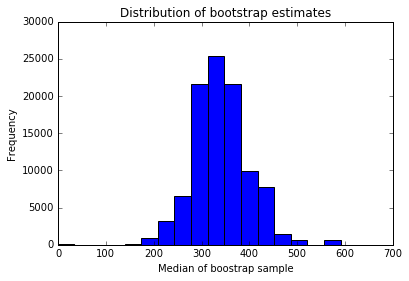

In [51]:
plt.hist(boot_est[:],20)
plt.xlabel('Median of boostrap sample')
plt.ylabel('Frequency')
plt.title('Distribution of bootstrap estimates')
plt.show()

The bootstrap estimate of the bias of the median of the data is defined as 

$$bias(\hat{\theta}) = E[\hat{\theta}] - \theta$$

As learned in class, we can substitute the empirical distribution $\hat{P}$ for $P$ to get the bootstrap estimate of the bias,

$$\hat{bias}(\hat{\theta}) = bias^* (\hat{\theta}^*) = {\hat{\theta}}^{*(\cdot)} - \theta^*$$

Where $\theta^* = t(\hat{P})$ is the median of our 'population' data set, and

$${\hat{\theta}}^{*(\cdot)} = \frac{1}{B} \sum_{b=1}^B {\hat{\theta}}^{* (b)}$$

This is implemented below.

In [52]:
theta_mean = np.mean(sample)
print("The mean of theta is %f" % theta_mean)
boot_bias = theta_mean - np.median(data)
print("The bootstrap estimate of the bias of our theta estimate is %f" % boot_bias)

The mean of theta is 340.173190
The bootstrap estimate of the bias of our theta estimate is 8.673190


The standard error of $\hat{\theta}$ is estimated by computing the standard deviation of our $B$ bootstrap replicates. Our bootstrap replicates are defined as

$$\hat{\theta}^{*(b)} = S(x^{*(b)}), \; b = 1, \dots, B$$

The standard error is computed with the formula

$$\hat{se}_{boot} (\hat{\theta}) = \bigg[ \frac{1}{B-1} \sum_{b=1}^B \big( \hat{\theta}^{*(b)} - \hat{\theta}^{*(\cdot)} {\big)}^2 {\bigg]}^{1/2}$$

Where $\hat{\theta}^{*(\cdot)} = \frac{1}{B} \sum_{b=1}^B \hat{\theta}^{*(b)}$

This is implemented in the following code using the matrix dot product to compute the sum of squares. That is, define $A$ as a $B \times 1$ matrix where the $i^{th}$ element is given by

$$A_i = \hat{\theta}^{*(i)} - \hat{\theta}^{*(\cdot)}$$

Then

$$A^T A = \sum_{b=1}^B {\big( \hat{\theta}^{*(b)} - \hat{\theta}^{*(\cdot)} \big)}^2$$

as required.

In [53]:
stdError = np.sqrt(1. / (B - 1) * np.dot(np.transpose(sample - theta_mean), (sample - theta_mean)))
print("The bootstrap estimate of the standard error is %f" % stdError)

The bootstrap estimate of the standard error is 58.390689




2\. We begin our Jackknife by forming $n$ sets of $n-1$ observations, leaving out each datum in turn.

In [54]:
jack_data = np.zeros((n-1, n))
for i in range(0, n):
    jack_data[:, i] = data[np.arange(len(data))!=(i)]
print(jack_data)

[[ 157.  840.  840. ...,  840.  840.  840.]
 [ 145.  145.  157. ...,  157.  157.  157.]
 [  44.   44.   44. ...,  145.  145.  145.]
 ..., 
 [  92.   92.   92. ...,  365.  365.  365.]
 [  82.   82.   82. ...,   82.   92.   92.]
 [ 220.  220.  220. ...,  220.  220.   82.]]


We can then use these $n$ samples to estimate the bais and standard error of the mean of data. First we create an $n$-length array to store the mean of each sample and then fill it with the sample means.

In [55]:
jack_mean = np.zeros((n,1))
for i in range(0, n):
    jack_mean[i] = np.mean(jack_data[:, i])

We can compute the bias of the mean of the data by defining 

$$bias(\hat{\theta}) = E[\hat{\theta}] - \theta$$

Where $\hat{\theta}$ is the estimate for the mean of the data. The jackknife estimate of the bias is

$${\hat{bias}}_{jack}(\hat{\theta}) = (n-1) \big( \overline{\hat{\theta}{(\cdot)}} - \hat{\theta} \big)$$

Where

$$\overline{\hat{\theta}{(\cdot)}} = \frac{1}{n} \sum_{i=1}^n \hat{\theta}_{(i)}$$

is the mean of the estimates where we left out one observation, and $\hat{\theta}$ is the estimate compute from the original sample. This is implemented below.

In [56]:
jack_bias = (n - 1) * (np.mean(jack_mean) - np.mean(data))
print("The Jackknife estimate of the bias of the mean of the data is %f" % jack_bias)

The Jackknife estimate of the bias of the mean of the data is 0.000000




The Jackknife estimate for the standard error of the mean of the data set can be found by using

$$\hat{se}_{jack} = \sqrt{ {\frac{n-1}{n} \sum_{i=1}^n \Big( \hat{\theta}_{(i)} - \overline{\hat{\theta}{(\cdot)}} \Big)}^2 }$$

This is implemented below.

In [57]:
se_jack = np.sqrt((n-1) / n * np.dot(np.transpose(jack_mean - np.mean(jack_mean)), (jack_mean - np.mean(jack_mean))))
se_jack

array([[ 50.79081714]])